# Flight Price Prediction

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [225]:
df = pd.read_csv('Flight_Details_Aggrigated.csv')
df.sample(5)

Unnamed: 0    Date          Airline Departure     Arrival  \
84989        84989   Aug 2  AirAsia (India)   1:40 PM     7:20 PM   
6197          6197  Aug 22          Vistara  12:30 PM     6:05 PM   
47935        47935   Aug 8          Vistara   8:30 PM  10:45 AM+1   
105398      105398  Jul 15           IndiGo   8:55 PM   7:25 AM+1   
119426      119426   Sep 8          Vistara   1:20 PM     6:20 PM   

            Duration    Route   Stops Layover  Layover_Time         Co2  \
84989    5 hr 40 min  BLR–DEL  1 stop     GOI   1 hr 50 min  139 kg CO2   
6197     5 hr 35 min  MAA–DEL  1 stop     BOM   1 hr 15 min  185 kg CO2   
47935   14 hr 15 min  MAA–BLR  1 stop     BOM  10 hr 30 min  167 kg CO2   
105398  10 hr 30 min  DEL–BOM  1 stop     NAG   7 hr 25 min  133 kg CO2   
119426          5 hr  DEL–BOM  1 stop     VNS   1 hr 25 min  169 kg CO2   

              Emissions    Price Data Scrap Date  
84989    +16% emissions   ₹8,394    15 July 2022  
6197     +50% emissions  ₹11,428    16 July 2022  
47935   +347% emissions   ₹8,982    16 July 2022  
105398   +39% emissions   ₹8,469    15 July 2022  
119426   +77% emissions  ₹10,605    15 July 2022

In [226]:
df.isnull().sum()

Unnamed: 0         0
Date               0
Airline            0
Departure          0
Arrival            0
Duration           0
Route              0
Stops              0
Layover            0
Layover_Time       0
Co2                0
Emissions          0
Price              0
Data Scrap Date    0
dtype: int64

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137107 entries, 0 to 137106
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       137107 non-null  int64 
 1   Date             137107 non-null  object
 2   Airline          137107 non-null  object
 3   Departure        137107 non-null  object
 4   Arrival          137107 non-null  object
 5   Duration         137107 non-null  object
 6   Route            137107 non-null  object
 7   Stops            137107 non-null  object
 8   Layover          137107 non-null  object
 9   Layover_Time     137107 non-null  object
 10  Co2              137107 non-null  object
 11  Emissions        137107 non-null  object
 12  Price            137107 non-null  object
 13  Data Scrap Date  137107 non-null  object
dtypes: int64(1), object(13)
memory usage: 14.6+ MB


## Preprocessing

#### Unnamed: 0
Let's drop Unnamed: 0 as it is same as the index number.

In [228]:
df.drop('Unnamed: 0',axis=1,inplace=True)

#### Price

In [229]:
for i in range(len(df)):
    df['Price'][i] = df['Price'][i].replace(',','')
    df['Price'][i] = df['Price'][i].replace('₹','')

In [230]:
df['Price'] = df['Price'].astype('int')

In [231]:
df.sample(5)

Date          Airline Departure     Arrival      Duration    Route  \
103813   Sep 8  AirAsia (India)   5:05 PM  12:50 AM+1   7 hr 45 min  DEL–BLR   
29135   Aug 26           IndiGo   8:30 AM     6:30 PM         10 hr  BOM–MAA   
128566  Aug 13         SpiceJet  11:15 AM     5:45 PM   6 hr 30 min  BOM–DEL   
124788  Jul 31           IndiGo   5:10 PM     7:25 PM   2 hr 15 min  BOM–DEL   
85163    Aug 2        SriLankan   9:10 PM   5:45 PM+1  20 hr 35 min  BLR–DEL   

          Stops Layover  Layover_Time         Co2        Emissions  Price  \
103813   1 stop     GAU          2 hr  215 kg CO2   +81% emissions   6542   
29135    1 stop     BLR   7 hr 10 min  109 kg CO2   +34% emissions   6519   
128566   1 stop     GOI   2 hr 10 min  215 kg CO2  +126% emissions  19423   
124788  Nonstop       -             -   86 kg CO2    -9% emissions   6893   
85163    1 stop     CMB  15 hr 30 min  301 kg CO2  +153% emissions  33008   

       Data Scrap Date  
103813    15 July 2022  
29135     16 July 2022  
128566    15 July 2022  
124788    15 July 2022  
85163     15 July 2022

#### Duration

In [232]:
df['Duration_Hrs'] = 0
df['Duration_Mins'] = 0
for i in range(len(df)):
    try:
        df['Duration_Hrs'][i] = df['Duration'][i].split('hr')[0]
        df['Duration_Mins'][i] = df['Duration'][i].split('hr')[1]
    except:
        df['Duration_Mins'][i] = df['Duration'][i]

In [233]:
df['Duration_Mins'] = df['Duration_Mins'].str.replace(' min','')

In [234]:
for i in range(len(df)):
    try:
        df['Duration_Hrs'][i]= df['Duration_Hrs'][i].strip()
        df['Duration_Mins'][i]= df['Duration_Mins'][i].strip()
    except:
        pass

In [235]:
df['Duration_Hrs'].unique()

array([2, 3, 11, 14, 26, 23, 5, 9, 7, 8, 6, 4, 15, 28, 13, 16, 17, 18, 25,
       10, 12, 22, 20, 21, 37, 34, 27, 35, 24, 36, 33, 30, 19, 29, 31, 32,
       38, 1, '45 min', '1', '55 min', '50 min', '7', '4', '8', '6', '11',
       '12', '16', '25', '9', '13', '23', '5', '10', '20', '3', '22',
       '14', '27', '26', '21', '24', '18', '17', '30', '29', '19', '15',
       '28', '34', '35', '32', '2', '36', '31', '37'], dtype=object)

In [236]:
df['Duration_Hrs'] = df['Duration_Hrs'].replace(['45 min','55 min', '50 min'],0)

In [237]:
df['Duration_Hrs'].unique()

array([2, 3, 11, 14, 26, 23, 5, 9, 7, 8, 6, 4, 15, 28, 13, 16, 17, 18, 25,
       10, 12, 22, 20, 21, 37, 34, 27, 35, 24, 36, 33, 30, 19, 29, 31, 32,
       38, 1, 0, '1', '7', '4', '8', '6', '11', '12', '16', '25', '9',
       '13', '23', '5', '10', '20', '3', '22', '14', '27', '26', '21',
       '24', '18', '17', '30', '29', '19', '15', '28', '34', '35', '32',
       '2', '36', '31', '37'], dtype=object)

In [238]:
df['Duration_Hrs'] = (df['Duration_Hrs'].astype('int'))*60

In [239]:
df['Duration_Mins'] = df['Duration_Mins'].replace('',0)

In [240]:
df['Duration_Mins'].unique()

array([' 50', ' 45', ' 55', ' 5', ' 20', ' 35', ' 15', ' 40', ' 25',
       ' 10', ' 30', 0, ' 31', ' 41', ' 26', '45', '55', '50', '40', '10',
       '30', '15', '25', '5', '20', '35'], dtype=object)

In [241]:
df['Duration_Mins'] = df['Duration_Mins'].astype('int')

In [242]:
df['Duration'] = df['Duration_Hrs']+df['Duration_Mins']

In [243]:
df.drop(['Duration_Hrs','Duration_Mins'],axis=1,inplace=True)

##### This data is for 4 metropolitan cities in India and logically nobody would take a flight which has a layover internationally, has a high price and takes too long. Under this presumption, we could remove the flights which have layovers internationally.

In [244]:
df['Layover'].unique()

array(['-', 'BOM', 'IXB', 'HYD', 'RPR', 'LKO', 'VTZ', 'JAI', 'BHO', 'SAG',
       'IXZ', 'MCT', 'DXB', 'CCU', 'CMB', 'KUL', 'BAH', 'DOH', 'PNQ',
       'GAU', 'BKK', 'AUH', 'SIN', 'KWI', 'JLR', 'BLR', 'BBI', 'CJB',
       'GOI', 'AMD', 'PAT', 'IXR', 'VNS', 'IXE', 'IXM', 'COK', 'CNN',
       'DEL', 'CCJ', 'TRZ', 'KJB', 'MAA', 'BDQ', 'IDR', 'HBX', 'KTM',
       'IXC', 'min', 'DED', 'NAG', 'STV', 'JRG', 'DBR', 'JED', 'IXD',
       'JDH', 'TRV', 'SXR', 'IXU', 'UDR', 'ATQ', 'RAJ', 'RUH', 'IXJ',
       'KQH', 'GOP'], dtype=object)

In [245]:
International = ['MCT','DXB','CMB','KUL','BAH','DOH','BKK','AUH','SIN','KWI','KTM','JED','min','RUH']

In [246]:
for airports in International:
    df = df[df['Layover'] != airports]

In [247]:
df = df.reset_index()
df.drop('index',axis=1,inplace=True)
df

Date    Airline Departure     Arrival  Duration    Route    Stops  \
0       Jul 16     IndiGo   6:20 AM     9:10 AM       170  MAA–DEL  Nonstop   
1       Jul 16     IndiGo   8:45 AM    11:30 AM       165  MAA–DEL  Nonstop   
2       Jul 16    Vistara  10:35 AM     1:20 PM       165  MAA–DEL  Nonstop   
3       Jul 16     IndiGo  10:40 AM     1:25 PM       165  MAA–DEL  Nonstop   
4       Jul 16     IndiGo   1:30 PM     4:20 PM       170  MAA–DEL  Nonstop   
...        ...        ...       ...         ...       ...      ...      ...   
120605  Sep 14    Vistara   2:05 PM     9:10 PM       425  BOM–DEL   1 stop   
120606  Sep 14    Vistara   5:20 PM   5:45 PM+1      1465  BOM–DEL   1 stop   
120607  Sep 14    Vistara  10:25 AM     3:20 PM       295  BOM–DEL   1 stop   
120608  Sep 14    Vistara  10:25 AM     5:00 PM       395  BOM–DEL   1 stop   
120609  Sep 14  Air India   5:10 PM  12:05 AM+1       415  BOM–DEL   1 stop   

       Layover  Layover_Time         Co2        Emissions  Price  \
0            -             -  117 kg CO2    Avg emissions   7151   
1            -             -  123 kg CO2    Avg emissions   7151   
2            -             -  130 kg CO2    Avg emissions   7514   
3            -             -  118 kg CO2    Avg emissions   7151   
4            -             -  117 kg CO2    Avg emissions   7151   
...        ...           ...         ...              ...    ...   
120605     CCU   1 hr 50 min  229 kg CO2  +140% emissions  12273   
120606     CCU  19 hr 25 min  229 kg CO2  +140% emissions  12273   
120607     SXR        35 min  190 kg CO2  +100% emissions  12326   
120608     SXR   2 hr 10 min  186 kg CO2   +95% emissions  12326   
120609     COK   1 hr 45 min  278 kg CO2  +192% emissions  12981   

       Data Scrap Date  
0         16 July 2022  
1         16 July 2022  
2         16 July 2022  
3         16 July 2022  
4         16 July 2022  
...                ...  
120605    15 July 2022  
120606    15 July 2022  
120607    15 July 2022  
120608    15 July 2022  
120609    15 July 2022  

[120610 rows x 13 columns]

### Converting Data Scrap Date to datetime format and finding the difference between reservation date and the travel dates

In [248]:
for i in range(len(df)):
    df['Date'][i] = pd.to_datetime(df['Date'][i] + ' 2022')

In [249]:
for i in range(len(df)):
    df['Data Scrap Date'][i] = pd.to_datetime(df['Data Scrap Date'][i])

In [250]:
df['Booking_Travel_Date_Difference'] = 0

In [251]:
df

Date    Airline Departure     Arrival  Duration  \
0       2022-07-16 00:00:00     IndiGo   6:20 AM     9:10 AM       170   
1       2022-07-16 00:00:00     IndiGo   8:45 AM    11:30 AM       165   
2       2022-07-16 00:00:00    Vistara  10:35 AM     1:20 PM       165   
3       2022-07-16 00:00:00     IndiGo  10:40 AM     1:25 PM       165   
4       2022-07-16 00:00:00     IndiGo   1:30 PM     4:20 PM       170   
...                     ...        ...       ...         ...       ...   
120605  2022-09-14 00:00:00    Vistara   2:05 PM     9:10 PM       425   
120606  2022-09-14 00:00:00    Vistara   5:20 PM   5:45 PM+1      1465   
120607  2022-09-14 00:00:00    Vistara  10:25 AM     3:20 PM       295   
120608  2022-09-14 00:00:00    Vistara  10:25 AM     5:00 PM       395   
120609  2022-09-14 00:00:00  Air India   5:10 PM  12:05 AM+1       415   

          Route    Stops Layover  Layover_Time         Co2        Emissions  \
0       MAA–DEL  Nonstop       -             -  117 kg CO2    Avg emissions   
1       MAA–DEL  Nonstop       -             -  123 kg CO2    Avg emissions   
2       MAA–DEL  Nonstop       -             -  130 kg CO2    Avg emissions   
3       MAA–DEL  Nonstop       -             -  118 kg CO2    Avg emissions   
4       MAA–DEL  Nonstop       -             -  117 kg CO2    Avg emissions   
...         ...      ...     ...           ...         ...              ...   
120605  BOM–DEL   1 stop     CCU   1 hr 50 min  229 kg CO2  +140% emissions   
120606  BOM–DEL   1 stop     CCU  19 hr 25 min  229 kg CO2  +140% emissions   
120607  BOM–DEL   1 stop     SXR        35 min  190 kg CO2  +100% emissions   
120608  BOM–DEL   1 stop     SXR   2 hr 10 min  186 kg CO2   +95% emissions   
120609  BOM–DEL   1 stop     COK   1 hr 45 min  278 kg CO2  +192% emissions   

        Price      Data Scrap Date  Booking_Travel_Date_Difference  
0        7151  2022-07-16 00:00:00                               0  
1        7151  2022-07-16 00:00:00                               0  
2        7514  2022-07-16 00:00:00                               0  
3        7151  2022-07-16 00:00:00                               0  
4        7151  2022-07-16 00:00:00                               0  
...       ...                  ...                             ...  
120605  12273  2022-07-15 00:00:00                               0  
120606  12273  2022-07-15 00:00:00                               0  
120607  12326  2022-07-15 00:00:00                               0  
120608  12326  2022-07-15 00:00:00                               0  
120609  12981  2022-07-15 00:00:00                               0  

[120610 rows x 14 columns]

In [252]:
df['Booking_Travel_Date_Difference'] = df['Date']-df['Data Scrap Date']

In [253]:
df['Booking_Travel_Date_Difference'] = df['Booking_Travel_Date_Difference'].astype('timedelta64[D]').astype(int)

In [254]:
df = df[df['Booking_Travel_Date_Difference']<=60]

In [255]:
df = df.reset_index()
df.drop('index',axis=1,inplace=True)
df

Date    Airline Departure     Arrival  Duration  \
0       2022-07-16 00:00:00     IndiGo   6:20 AM     9:10 AM       170   
1       2022-07-16 00:00:00     IndiGo   8:45 AM    11:30 AM       165   
2       2022-07-16 00:00:00    Vistara  10:35 AM     1:20 PM       165   
3       2022-07-16 00:00:00     IndiGo  10:40 AM     1:25 PM       165   
4       2022-07-16 00:00:00     IndiGo   1:30 PM     4:20 PM       170   
...                     ...        ...       ...         ...       ...   
119091  2022-09-13 00:00:00    Vistara   5:20 PM   5:45 PM+1      1465   
119092  2022-09-13 00:00:00    Vistara  10:25 AM     3:20 PM       295   
119093  2022-09-13 00:00:00    Vistara  10:25 AM     5:00 PM       395   
119094  2022-09-13 00:00:00  Air India   5:10 PM  12:05 AM+1       415   
119095  2022-09-13 00:00:00   GO FIRST   4:35 PM   2:20 AM+1       585   

          Route    Stops Layover  Layover_Time         Co2        Emissions  \
0       MAA–DEL  Nonstop       -             -  117 kg CO2    Avg emissions   
1       MAA–DEL  Nonstop       -             -  123 kg CO2    Avg emissions   
2       MAA–DEL  Nonstop       -             -  130 kg CO2    Avg emissions   
3       MAA–DEL  Nonstop       -             -  118 kg CO2    Avg emissions   
4       MAA–DEL  Nonstop       -             -  117 kg CO2    Avg emissions   
...         ...      ...     ...           ...         ...              ...   
119091  BOM–DEL   1 stop     CCU  19 hr 25 min  229 kg CO2  +140% emissions   
119092  BOM–DEL   1 stop     SXR        35 min  190 kg CO2  +100% emissions   
119093  BOM–DEL   1 stop     SXR   2 hr 10 min  186 kg CO2   +95% emissions   
119094  BOM–DEL   1 stop     COK   1 hr 45 min  278 kg CO2  +192% emissions   
119095  BOM–DEL   1 stop     GOI   5 hr 40 min  147 kg CO2   +54% emissions   

        Price      Data Scrap Date  Booking_Travel_Date_Difference  
0        7151  2022-07-16 00:00:00                               0  
1        7151  2022-07-16 00:00:00                               0  
2        7514  2022-07-16 00:00:00                               0  
3        7151  2022-07-16 00:00:00                               0  
4        7151  2022-07-16 00:00:00                               0  
...       ...                  ...                             ...  
119091  12273  2022-07-15 00:00:00                              60  
119092  12326  2022-07-15 00:00:00                              60  
119093  12326  2022-07-15 00:00:00                              60  
119094  12981  2022-07-15 00:00:00                              60  
119095  15102  2022-07-15 00:00:00                              60  

[119096 rows x 14 columns]

In [256]:
df.sample(5)

Date  Airline Departure     Arrival  Duration    Route  \
112392  2022-08-17 00:00:00   IndiGo   4:50 AM     7:10 AM       140  BOM–DEL   
95619   2022-08-04 00:00:00  Vistara   5:30 PM   1:00 PM+1      1170  DEL–BOM   
822     2022-07-22 00:00:00  Vistara   7:00 AM     2:05 PM       425  MAA–DEL   
2826    2022-08-06 00:00:00  Vistara  12:30 PM  11:00 AM+1      1350  MAA–DEL   
80965   2022-08-02 00:00:00  Vistara   2:20 PM    11:10 PM       530  DEL–BLR   

          Stops Layover  Layover_Time         Co2        Emissions  Price  \
112392  Nonstop       -             -           –                -   6023   
95619    1 stop     CCU  14 hr 50 min  229 kg CO2  +140% emissions  14700   
822      1 stop     BOM   2 hr 55 min  185 kg CO2   +50% emissions  16678   
2826     1 stop     BOM  18 hr 15 min  185 kg CO2   +50% emissions  11428   
80965    1 stop     BOM          5 hr  173 kg CO2   +45% emissions  12495   

            Data Scrap Date  Booking_Travel_Date_Difference  
112392  2022-07-15 00:00:00                              33  
95619   2022-07-15 00:00:00                              20  
822     2022-07-16 00:00:00                               6  
2826    2022-07-16 00:00:00                              21  
80965   2022-07-15 00:00:00                              18

### Extracting Day of week from Travel Date

In [257]:
df['Dept_day_of_Week'] = ' '
for i in range(len(df)):
    temp = pd.Timestamp(df['Date'][i])
    df['Dept_day_of_Week'][i] = temp.day_name()
df.sample(5)

Date   Airline Departure     Arrival  Duration    Route  \
24714  2022-08-31 00:00:00   Vistara   6:30 PM   4:25 PM+1      1315  BOM–MAA   
70264  2022-07-24 00:00:00   Vistara   9:30 AM   8:05 AM+1      1355  BLR–DEL   
51164  2022-08-22 00:00:00   Vistara   7:40 PM  11:10 AM+1       930  BLR–BOM   
68917  2022-07-19 00:00:00  SpiceJet   9:15 AM   8:50 AM+1      1415  BLR–DEL   
26671  2022-09-13 00:00:00   Vistara   6:30 AM     8:15 PM       825  BOM–MAA   

        Stops Layover  Layover_Time         Co2        Emissions  Price  \
24714  1 stop     DEL  16 hr 55 min  225 kg CO2  +178% emissions  10425   
70264  1 stop     BOM  18 hr 35 min  173 kg CO2   +45% emissions  15379   
51164  1 stop     DEL  10 hr 30 min  233 kg CO2  +221% emissions  10696   
68917  1 stop     PNQ  19 hr 50 min  139 kg CO2   +17% emissions   9246   
26671  1 stop     DEL   8 hr 50 min  225 kg CO2  +178% emissions  10425   

           Data Scrap Date  Booking_Travel_Date_Difference Dept_day_of_Week  
24714  2022-07-16 00:00:00                              46        Wednesday  
70264  2022-07-15 00:00:00                               9           Sunday  
51164  2022-07-16 00:00:00                              37           Monday  
68917  2022-07-15 00:00:00                               4          Tuesday  
26671  2022-07-16 00:00:00                              59          Tuesday

Since we already have the details of dooking date and travel dates captured in Booking_Travel_Date_Difference, we could drop both Date and Data Scrap Date

In [258]:
df.drop(['Date','Data Scrap Date'],axis=1,inplace=True)

In [259]:
df.sample(4)

Airline Departure     Arrival  Duration    Route   Stops Layover  \
105947   Vistara   9:20 PM   9:00 AM+1       700  BOM–DEL  1 stop     HYD   
9766    SpiceJet   6:30 AM     6:25 PM       715  DEL–MAA  1 stop     IXB   
44195    Vistara   9:45 AM     5:40 PM       475  BLR–BOM  1 stop     DEL   
32557    Vistara   9:40 PM  11:05 PM+1      1525  BLR–MAA  1 stop     BOM   

        Layover_Time         Co2        Emissions  Price  \
105947   8 hr 20 min  167 kg CO2   +75% emissions  14583   
9766            7 hr  291 kg CO2  +123% emissions   9030   
44195    2 hr 50 min  222 kg CO2  +206% emissions  13048   
32557   21 hr 35 min  167 kg CO2  +347% emissions  17689   

        Booking_Travel_Date_Difference Dept_day_of_Week  
105947                               5        Wednesday  
9766                                10          Tuesday  
44195                                3          Tuesday  
32557                                8           Sunday

#### Departure

In [260]:
from datetime import datetime

In [261]:
for i in range(len(df)):
    m2 = df['Departure'][i]
    in_time = datetime.strptime(m2, "%I:%M %p")
    out_time = datetime.strftime(in_time, "%H:%M")
    df['Departure'][i] = out_time

In [262]:
df['Departure_Hour'] = ' '
df['Departure_Minute'] = ' '
for i in range(len(df)):
    df['Departure_Hour'][i] = df['Departure'][i].split(':')[0]
    df['Departure_Minute'][i] = df['Departure'][i].split(':')[1]

In [263]:
df.drop('Departure',axis=1,inplace=True)

In [264]:
df['Departure_Hour'] = df['Departure_Hour'].astype('int')

In [265]:
df['Departure_Minute'] = df['Departure_Minute'].astype('int')

In [266]:
df.tail()

Airline     Arrival  Duration    Route   Stops Layover  \
119091    Vistara   5:45 PM+1      1465  BOM–DEL  1 stop     CCU   
119092    Vistara     3:20 PM       295  BOM–DEL  1 stop     SXR   
119093    Vistara     5:00 PM       395  BOM–DEL  1 stop     SXR   
119094  Air India  12:05 AM+1       415  BOM–DEL  1 stop     COK   
119095   GO FIRST   2:20 AM+1       585  BOM–DEL  1 stop     GOI   

        Layover_Time         Co2        Emissions  Price  \
119091  19 hr 25 min  229 kg CO2  +140% emissions  12273   
119092        35 min  190 kg CO2  +100% emissions  12326   
119093   2 hr 10 min  186 kg CO2   +95% emissions  12326   
119094   1 hr 45 min  278 kg CO2  +192% emissions  12981   
119095   5 hr 40 min  147 kg CO2   +54% emissions  15102   

        Booking_Travel_Date_Difference Dept_day_of_Week  Departure_Hour  \
119091                              60          Tuesday              17   
119092                              60          Tuesday              10   
119093                              60          Tuesday              10   
119094                              60          Tuesday              17   
119095                              60          Tuesday              16   

        Departure_Minute  
119091                20  
119092                25  
119093                25  
119094                10  
119095                35

From above, we see that the Arrival time is the combination of departure time + Duration(which includes layover time). Since, we already have duration, we could drop layover time and Arrival 

In [267]:
df.drop(['Layover_Time','Arrival'],axis=1,inplace=True)

In [268]:
df.sample(4)

Airline  Duration    Route    Stops Layover         Co2  \
108203          Vistara      1675  BOM–DEL   1 stop     BLR  205 kg CO2   
5626            Vistara       160  MAA–DEL  Nonstop       -  130 kg CO2   
63180   AirAsia (India)       110  BOM–BLR  Nonstop       -   73 kg CO2   
113135           IndiGo       120  BOM–DEL  Nonstop       -   86 kg CO2   

              Emissions  Price  Booking_Travel_Date_Difference  \
108203  +115% emissions  14951                              15   
5626      Avg emissions   6494                              42   
63180     Avg emissions   5064                              37   
113135    -9% emissions   6023                              36   

       Dept_day_of_Week  Departure_Hour  Departure_Minute  
108203         Saturday              17                30  
5626           Saturday               7                 5  
63180            Sunday              21                20  
113135         Saturday              14                35

#### Stops

In [269]:
df['Stops'].unique()

array(['Nonstop', '1 stop'], dtype=object)

In [270]:
df['Stops'] = df['Stops'].replace('Nonstop',0)
df['Stops'] = df['Stops'].replace('1 stop',1)

In [271]:
df.sample(5)

Airline  Duration    Route  Stops Layover         Co2  \
102098    Vistara       130  DEL–BOM      0       -   95 kg CO2   
17543   Air India      1255  DEL–MAA      1     BOM  225 kg CO2   
24499      IndiGo       550  BOM–MAA      1     COK  136 kg CO2   
39297      IndiGo        60  MAA–BLR      0       -   37 kg CO2   
58064      IndiGo       425  BOM–BLR      1     MAA  118 kg CO2   

             Emissions  Price  Booking_Travel_Date_Difference  \
102098   Avg emissions   6091                              49   
17543   +73% emissions  11730                              59   
24499   +68% emissions   6338                              45   
39297    Avg emissions   4192                              18   
58064   +62% emissions   6838                              12   

       Dept_day_of_Week  Departure_Hour  Departure_Minute  
102098           Friday              15                30  
17543           Tuesday              14                 0  
24499           Tuesday              11                 0  
39297         Wednesday              21                35  
58064         Wednesday              15                30

#### On research we found C02 and Emissions do not add to ticket costs, hence we could drop them.

In [272]:
df.drop(['Emissions','Co2'],axis=1,inplace=True)

In [273]:
df.sample(5)

Airline  Duration    Route  Stops Layover  Price  \
114323    Vistara       710  BOM–DEL      1     AMD   6005   
20436      IndiGo       580  BOM–MAA      1     IXM   6883   
95540   Air India      1625  DEL–BOM      1     AMD  11437   
22123      IndiGo       360  BOM–MAA      1     HYD   7336   
61406   Air India       675  BOM–BLR      1     DEL  12075   

        Booking_Travel_Date_Difference Dept_day_of_Week  Departure_Hour  \
114323                              41         Thursday              22   
20436                               18        Wednesday              12   
95540                               20         Thursday              19   
22123                               29           Sunday              16   
61406                               28           Friday               9   

        Departure_Minute  
114323                35  
20436                  0  
95540                  0  
22123                  5  
61406                  0

### Visualization

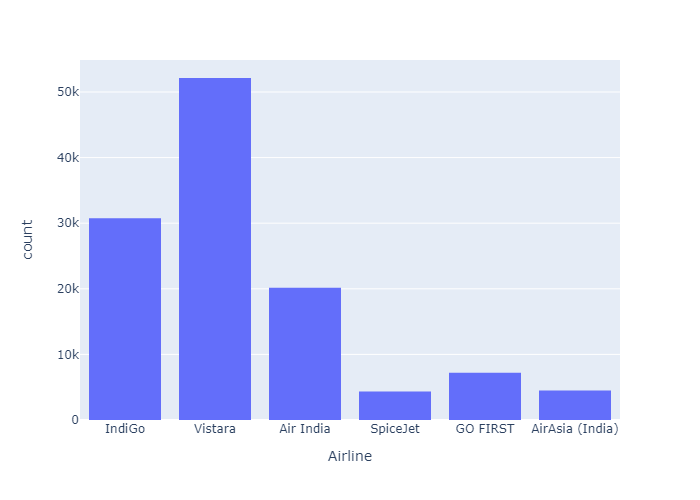

In [274]:
fig = px.histogram(df, x='Airline')
fig.show(renderer="png")

We see that Vistara is the most prefered airlines and Spice Jet the least.

In [180]:
pivot = df.pivot_table(values='Price',index='Airline',aggfunc=(lambda x : x.mean()))
pivot = np.round(pivot.sort_values(by='Price',ascending=True),0)
pivot

Price
Airline                 
AirAsia (India)   6786.0
IndiGo            7371.0
SpiceJet          9424.0
GO FIRST          9814.0
Vistara          11937.0
Air India        12046.0

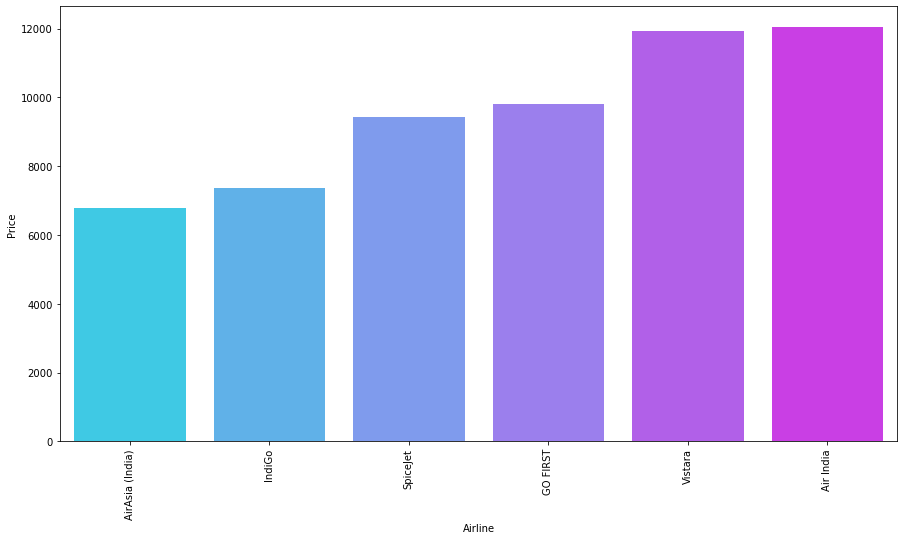

In [181]:
plt.figure(figsize=(15,8))
sns.barplot(x =pivot.index,y=pivot['Price'],palette='cool')
plt.xticks(rotation=90)
plt.show()

* We also see that AirAsia(India)is the cheapest when it comes to price and Air India is the most Expensive.

In [182]:
pivot = df.pivot_table(values='Price',index='Stops',aggfunc=(lambda x : x.mean()))
pivot = np.round(pivot.sort_values(by='Price',ascending=True),0)
pivot

Price
Stops         
0       6474.0
1      11025.0

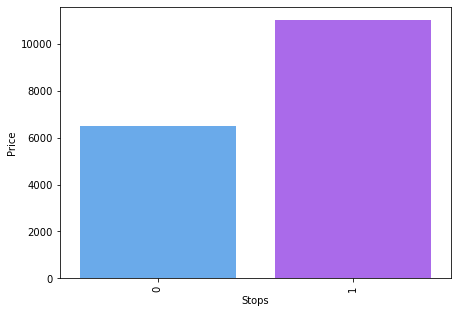

In [183]:
plt.figure(figsize=(7,5))
sns.barplot(x =pivot.index,y=pivot['Price'],palette='cool')
plt.xticks(rotation=90)
plt.show()

We see that Non-Stop flights are cheaper than flights with a stop

In [184]:
pivot = df.pivot_table(values='Price',index='Layover',aggfunc=(lambda x : x.mean()))
pivot = np.round(pivot.sort_values(by='Price',ascending=True),0)
pivot

Price
Layover         
TRZ       5022.0
KJB       6191.0
-         6474.0
BDQ       6525.0
IXE       6630.0
HBX       6728.0
CJB       6891.0
IXM       7358.0
CNN       7595.0
JAI       7807.0
NAG       7963.0
AMD       8092.0
BHO       8145.0
COK       8582.0
IXU       8601.0
RPR       8641.0
IXR       8730.0
STV       8895.0
CCJ       8904.0
MAA       9145.0
HYD       9161.0
JLR       9323.0
KQH       9359.0
IDR       9417.0
VTZ       9604.0
GAU       9824.0
GOP       9855.0
LKO       9866.0
GOI       9879.0
RAJ      10170.0
JDH      10176.0
DED      10235.0
SAG      10340.0
UDR      10347.0
PNQ      10518.0
BLR      10617.0
JRG      10641.0
IXJ      10843.0
ATQ      11173.0
DBR      11222.0
SXR      11339.0
PAT      11385.0
IXC      11401.0
IXB      11468.0
VNS      11750.0
BOM      12132.0
IXD      12296.0
BBI      12351.0
TRV      12371.0
CCU      12497.0
DEL      12567.0
IXZ      16552.0

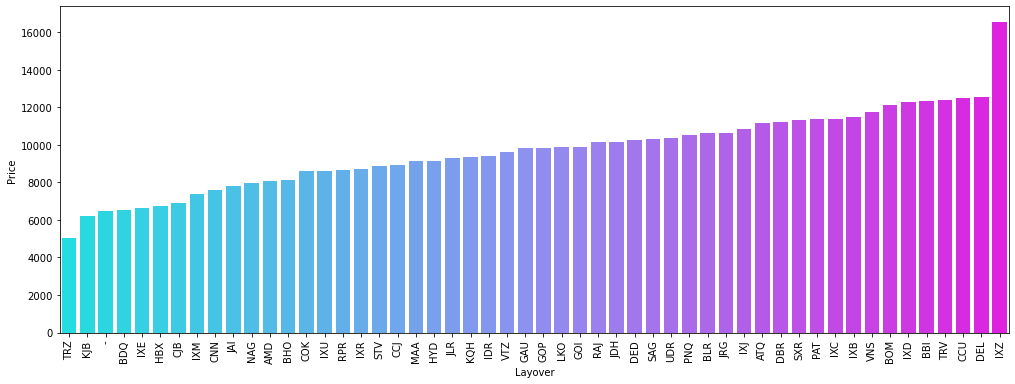

In [185]:
plt.figure(figsize=(17,6))
sns.barplot(x =pivot.index,y=pivot['Price'],palette='cool')
plt.xticks(rotation=90)
plt.show()

We see flights with layover at TRZ and KJB are the cheapest followed by non-stop flights.

In [186]:
pivot = df.pivot_table(values='Price',index='Booking_Travel_Date_Difference',aggfunc=(lambda x : x.mean()))
pivot = np.round(pivot,0)
pivot

Price
Booking_Travel_Date_Difference         
0                               13957.0
1                               13471.0
2                               13128.0
3                               12449.0
4                               12447.0
...                                 ...
56                               9109.0
57                               9129.0
58                               9157.0
59                               9033.0
60                               8996.0

[61 rows x 1 columns]

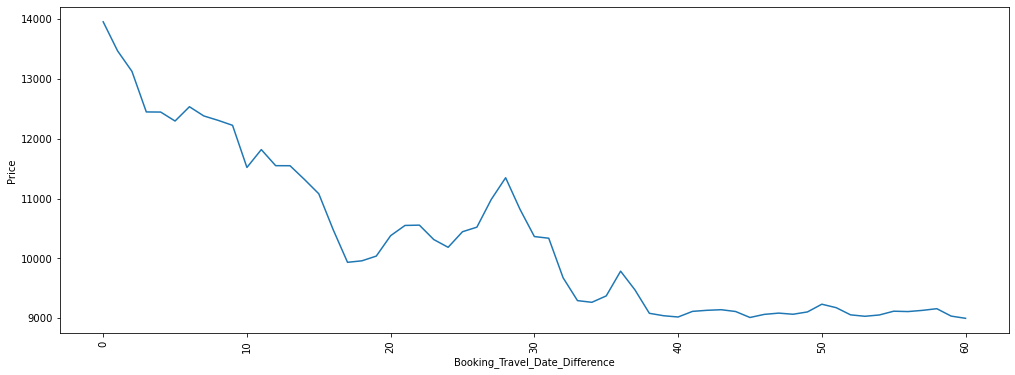

In [187]:
plt.figure(figsize=(17,6))
sns.lineplot(x =pivot.index,y=pivot['Price'])
plt.xticks(rotation=90)
plt.show()

We see that as the Booking Date vs Travel Date Difference increases, the prices decrease

In [188]:
pivot = df.pivot_table(values='Price',index='Dept_day_of_Week',aggfunc=(lambda x : x.mean()))
pivot = np.round(pivot.sort_values(by='Price',ascending=True),0)
pivot

Price
Dept_day_of_Week         
Tuesday           10060.0
Thursday          10177.0
Wednesday         10177.0
Monday            10204.0
Saturday          10584.0
Friday            10619.0
Sunday            10698.0

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


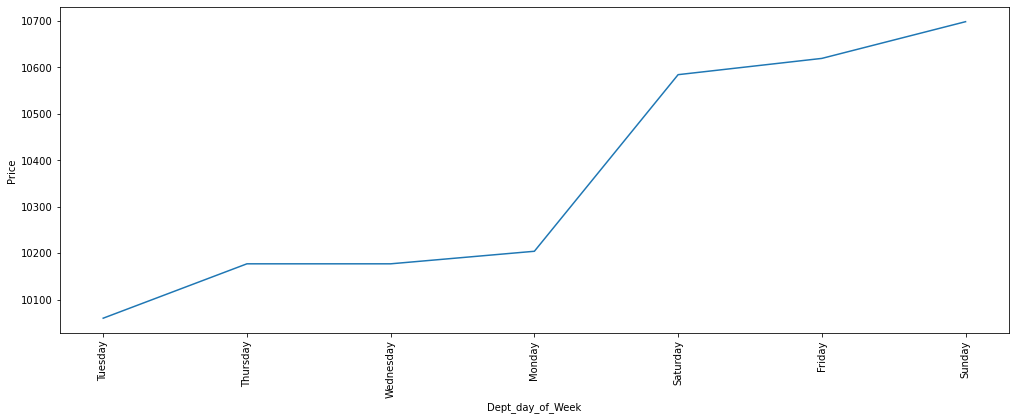

In [189]:
plt.figure(figsize=(17,6))
sns.lineplot(x =pivot.index,y=pivot['Price'])
plt.xticks(rotation=90)
plt.show()

We see the flight prices are the cheapest during midweek and the most expensive on weekends

In [190]:
pivot = df.pivot_table(values='Price',index='Departure_Hour',aggfunc=(lambda x : x.mean()))
pivot = np.round(pivot.sort_values(by='Price',ascending=True),0)
pivot

Price
Departure_Hour         
0                6591.0
23               6822.0
2                7738.0
1                8060.0
3                8077.0
22               8490.0
4                8857.0
5                9626.0
15               9670.0
14               9974.0
8               10079.0
13              10115.0
9               10162.0
12              10203.0
7               10215.0
16              10256.0
6               10374.0
11              10403.0
18              10406.0
19              10623.0
17              10858.0
10              10943.0
20              11219.0
21              11500.0

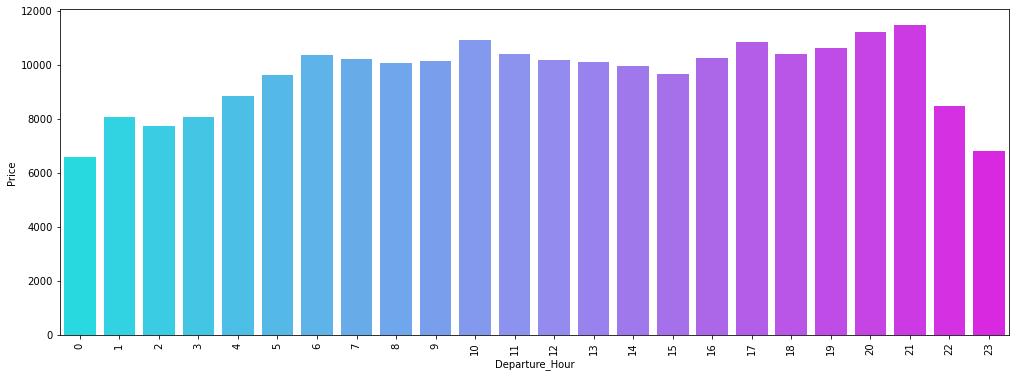

In [191]:
plt.figure(figsize=(17,6))
sns.barplot(x =pivot.index,y=pivot['Price'],palette='cool')
plt.xticks(rotation=90)
plt.show()

We see that the flight prices are generally higher for the flights between 11pm to 4 am, this may be due to majority of international flights operating at night

In [192]:
pivot = df.pivot_table(values='Price',index='Route',aggfunc=(lambda x : x.mean()))
pivot = np.round(pivot.sort_values(by='Price',ascending=True),0)
pivot

Price
Route           
BOM–BLR   9694.0
BLR–BOM   9698.0
BOM–MAA   9731.0
DEL–BOM   9842.0
BOM–DEL  10038.0
DEL–BLR  10412.0
MAA–BOM  10495.0
DEL–MAA  10658.0
MAA–DEL  11185.0
BLR–MAA  11343.0
MAA–BLR  11359.0
BLR–DEL  11647.0

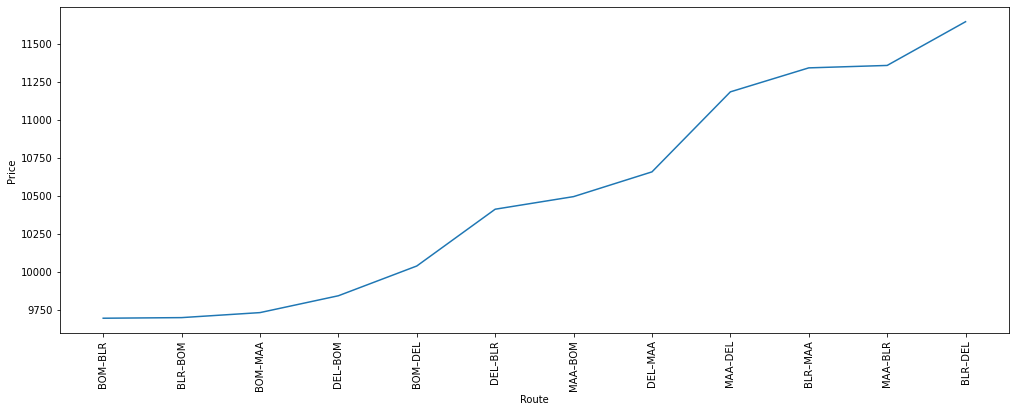

In [207]:
plt.figure(figsize=(17,6))
sns.lineplot(x =pivot.index,y=pivot['Price'])
plt.xticks(rotation=90)
plt.show()

We see that flights operating on Mumbai- Bangalore route are the cheapest and Bangalore-Delhi the most expensive.

In [194]:
df

Airline  Duration    Route  Stops Layover  Price  \
0          IndiGo       170  MAA–DEL      0       -   7151   
1          IndiGo       165  MAA–DEL      0       -   7151   
2         Vistara       165  MAA–DEL      0       -   7514   
3          IndiGo       165  MAA–DEL      0       -   7151   
4          IndiGo       170  MAA–DEL      0       -   7151   
...           ...       ...      ...    ...     ...    ...   
119091    Vistara      1465  BOM–DEL      1     CCU  12273   
119092    Vistara       295  BOM–DEL      1     SXR  12326   
119093    Vistara       395  BOM–DEL      1     SXR  12326   
119094  Air India       415  BOM–DEL      1     COK  12981   
119095   GO FIRST       585  BOM–DEL      1     GOI  15102   

        Booking_Travel_Date_Difference Dept_day_of_Week  Departure_Hour  \
0                                    0         Saturday               6   
1                                    0         Saturday               8   
2                                    0         Saturday              10   
3                                    0         Saturday              10   
4                                    0         Saturday              13   
...                                ...              ...             ...   
119091                              60          Tuesday              17   
119092                              60          Tuesday              10   
119093                              60          Tuesday              10   
119094                              60          Tuesday              17   
119095                              60          Tuesday              16   

        Departure_Minute  
0                     20  
1                     45  
2                     35  
3                     40  
4                     30  
...                  ...  
119091                20  
119092                25  
119093                25  
119094                10  
119095                35  

[119096 rows x 10 columns]

### Encoding

In [275]:
df.dtypes

Airline                           object
Duration                           int32
Route                             object
Stops                              int64
Layover                           object
Price                              int32
Booking_Travel_Date_Difference     int32
Dept_day_of_Week                  object
Departure_Hour                     int32
Departure_Minute                   int32
dtype: object

In [276]:
df = pd.get_dummies(df,columns=['Airline','Dept_day_of_Week','Route','Layover'],drop_first=True)

In [277]:
df

Duration  Stops  Price  Booking_Travel_Date_Difference  \
0            170      0   7151                               0   
1            165      0   7151                               0   
2            165      0   7514                               0   
3            165      0   7151                               0   
4            170      0   7151                               0   
...          ...    ...    ...                             ...   
119091      1465      1  12273                              60   
119092       295      1  12326                              60   
119093       395      1  12326                              60   
119094       415      1  12981                              60   
119095       585      1  15102                              60   

        Departure_Hour  Departure_Minute  Airline_AirAsia (India)  \
0                    6                20                        0   
1                    8                45                        0   
2                   10                35                        0   
3                   10                40                        0   
4                   13                30                        0   
...                ...               ...                      ...   
119091              17                20                        0   
119092              10                25                        0   
119093              10                25                        0   
119094              17                10                        0   
119095              16                35                        0   

        Airline_GO FIRST  Airline_IndiGo  Airline_SpiceJet  ...  Layover_RAJ  \
0                      0               1                 0  ...            0   
1                      0               1                 0  ...            0   
2                      0               0                 0  ...            0   
3                      0               1                 0  ...            0   
4                      0               1                 0  ...            0   
...                  ...             ...               ...  ...          ...   
119091                 0               0                 0  ...            0   
119092                 0               0                 0  ...            0   
119093                 0               0                 0  ...            0   
119094                 0               0                 0  ...            0   
119095                 1               0                 0  ...            0   

        Layover_RPR  Layover_SAG  Layover_STV  Layover_SXR  Layover_TRV  \
0                 0            0            0            0            0   
1                 0            0            0            0            0   
2                 0            0            0            0            0   
3                 0            0            0            0            0   
4                 0            0            0            0            0   
...             ...          ...          ...          ...          ...   
119091            0            0            0            0            0   
119092            0            0            0            1            0   
119093            0            0            0            1            0   
119094            0            0            0            0            0   
119095            0            0            0            0            0   

        Layover_TRZ  Layover_UDR  Layover_VNS  Layover_VTZ  
0                 0            0            0            0  
1                 0            0            0            0  
2                 0            0            0            0  
3                 0            0            0            0  
4                 0            0            0            0  
...             ...          ...          ...          ...  
119091            0            0            0            0  
119092            0            0    

### Checking Correlation

In [198]:
df.corr()

Duration     Stops     Price  \
Duration                        1.000000  0.504101  0.504211   
Stops                           0.504101  1.000000  0.457901   
Price                           0.504211  0.457901  1.000000   
Booking_Travel_Date_Difference -0.020368 -0.008175 -0.339267   
Departure_Hour                  0.179093 -0.007766  0.089669   
...                                  ...       ...       ...   
Layover_TRV                    -0.004659  0.003168  0.004391   
Layover_TRZ                    -0.030444  0.016946 -0.062433   
Layover_UDR                     0.033934  0.019176 -0.000198   
Layover_VNS                    -0.009217  0.020763  0.019894   
Layover_VTZ                    -0.007544  0.021277 -0.011131   

                                Booking_Travel_Date_Difference  \
Duration                                             -0.020368   
Stops                                                -0.008175   
Price                                                -0.339267   
Booking_Travel_Date_Difference                        1.000000   
Departure_Hour                                       -0.010495   
...                                                        ...   
Layover_TRV                                          -0.005242   
Layover_TRZ                                           0.002556   
Layover_UDR                                           0.002991   
Layover_VNS                                           0.005506   
Layover_VTZ                                          -0.000238   

                                Departure_Hour  Departure_Minute  \
Duration                              0.179093          0.032054   
Stops                                -0.007766          0.003669   
Price                                 0.089669          0.018026   
Booking_Travel_Date_Difference       -0.010495         -0.006446   
Departure_Hour                        1.000000          0.089919   
...                                        ...               ...   
Layover_TRV                           0.002688          0.005645   
Layover_TRZ                          -0.003533          0.019189   
Layover_UDR                          -0.003109         -0.020629   
Layover_VNS                          -0.017523         -0.006304   
Layover_VTZ                          -0.030703         -0.030341   

                                Airline_AirAsia (India)  Airline_GO FIRST  \
Duration                                      -0.102125         -0.147569   
Stops                                         -0.032595         -0.063834   
Price                                         -0.202342         -0.039619   
Booking_Travel_Date_Difference                 0.052517          0.023500   
Departure_Hour                                 0.011132         -0.025842   
...                                                 ...               ...   
Layover_TRV                                   -0.001522         -0.001946   
Layover_TRZ                                   -0.008141         -0.010411   
Layover_UDR                                   -0.009213         -0.011781   
Layover_VNS                                   -0.009975          0.016044   
Layover_VTZ                                    0.057403         -0.013072   

                                Airline_IndiGo  Airline_SpiceJet  ...  \
Duration                             -0.468762         -0.047990  ...   
Stops                                -0.144248         -0.039632  ...   
Price                                -0.503010         -0.051925  ...   
Booking_Travel_Date_Difference       -0.012625          0.003730  ...   
Departure_Hour                       -0.125071         -0.013630  ...   
...                                        ...               ...  ...   
Layover_TRV                           0.007992         -0.001489  ...   
Layover_TRZ                           0.069529         -0.007966  ...   
Layover_UDR                          -0.027378         -0.009014  ...  

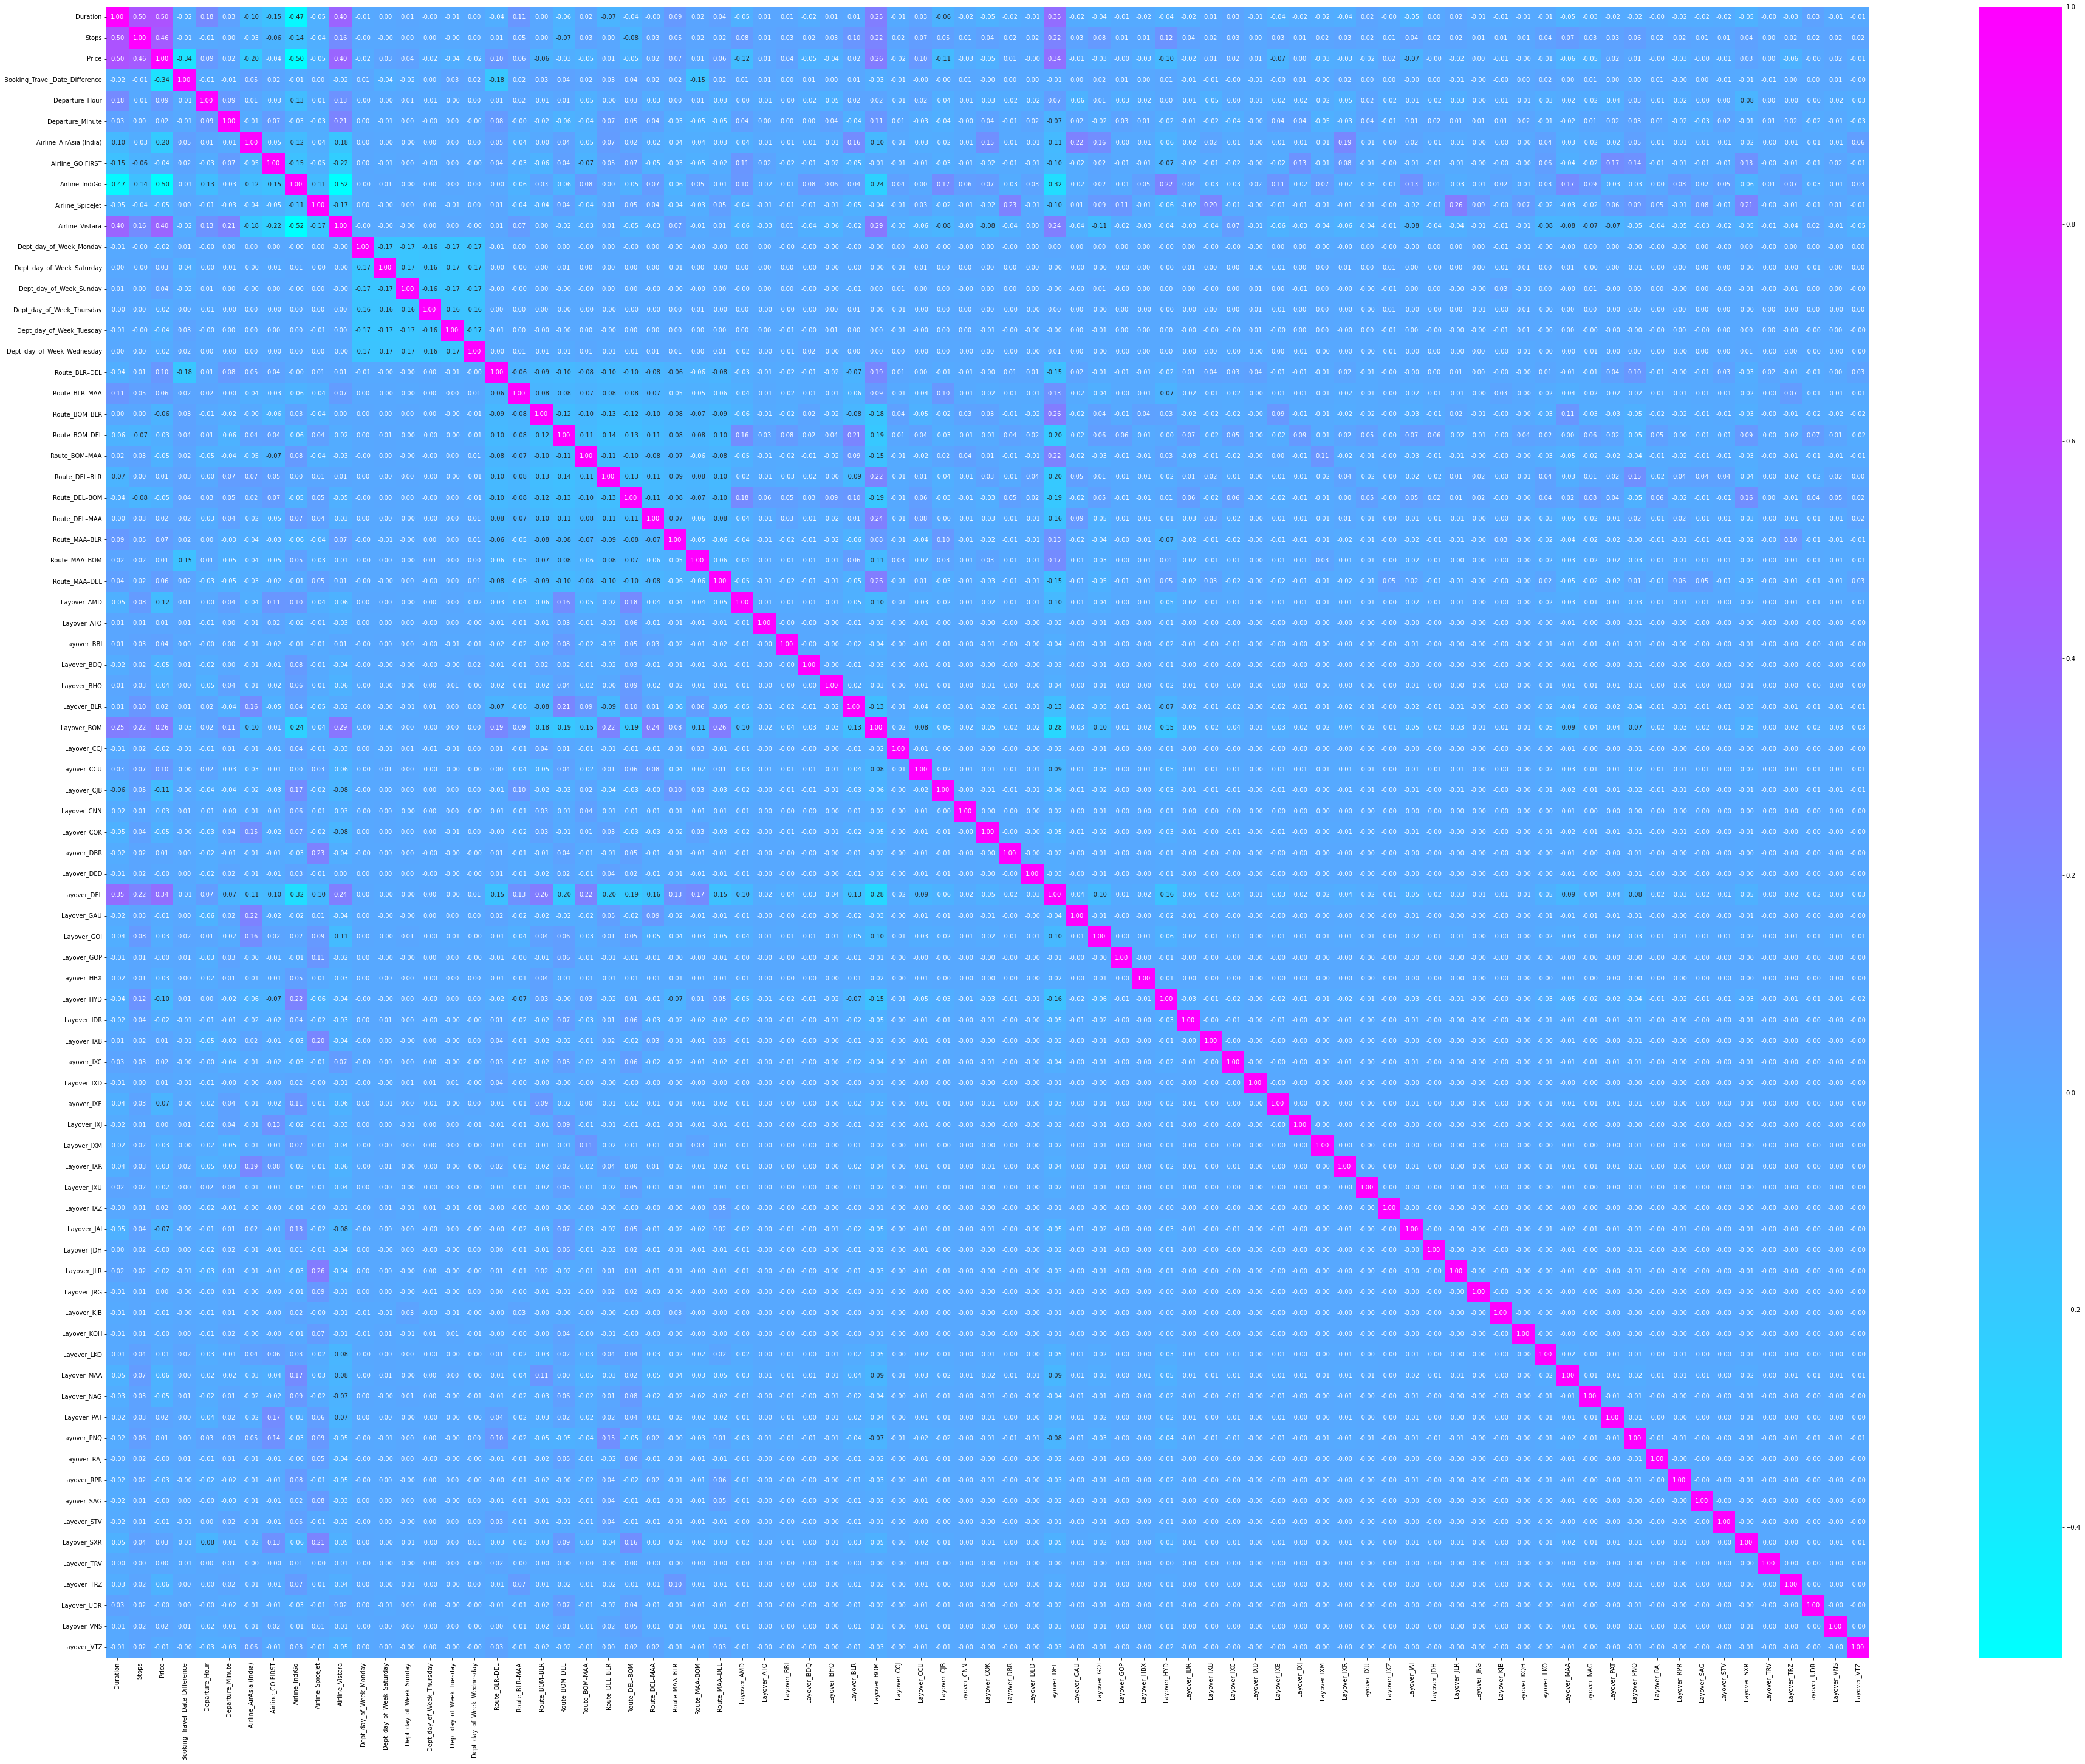

In [71]:
plt.figure(figsize=(65,50))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='cool')
plt.show()

We see that the features are both positively and negitively correlated with the Target Varriable.

    - Duration has the Highest Positive Correlation.
    - Airline_Indigo Highest Negitive Correlation

### Removing Outliers

In [278]:
df.shape

(119096, 79)

In [279]:
Q3 = df['Price'].quantile(0.75)
Q1 = df['Price'].quantile(0.25)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
outliers = df[(df['Price']<lower_limit) | (df['Price']> upper_limit)]
z = outliers.index
df_new = df.drop(z,axis=0)
df_new.shape

(117474, 79)

In [280]:
Q3 = df_new['Duration'].quantile(0.75)
Q1 = df_new['Duration'].quantile(0.25)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
outliers = df_new[(df_new['Duration']<lower_limit) | (df_new['Duration']> upper_limit)]
z = outliers.index
df_new = df_new.drop(z,axis=0)
df_new.shape

(117446, 79)

In [281]:
Percentage_Data_Loss = (119096-117446)/119096*100
Percentage_Data_Loss

1.385436958420098

### Splitting the dataframe into features and target

In [282]:
x = df_new.drop('Price',axis=1)
x.shape

(117446, 78)

In [283]:
y = df_new['Price']
y.shape

(117446,)

### Scaling the Model

In [284]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [285]:
sc = StandardScaler()
X = sc.fit_transform(x)
X = pd.DataFrame(X,columns=x.columns)
X

Duration     Stops  Booking_Travel_Date_Difference  Departure_Hour  \
0      -1.137977 -2.403058                       -1.713096       -1.289872   
1      -1.148230 -2.403058                       -1.713096       -0.924387   
2      -1.148230 -2.403058                       -1.713096       -0.558901   
3      -1.148230 -2.403058                       -1.713096       -0.558901   
4      -1.137977 -2.403058                       -1.713096       -0.010672   
...          ...       ...                             ...             ...   
117441  1.517465  0.416136                        1.786148        0.720299   
117442 -0.881661  0.416136                        1.786148       -0.558901   
117443 -0.676607  0.416136                        1.786148       -0.558901   
117444 -0.635596  0.416136                        1.786148        0.720299   
117445 -0.287005  0.416136                        1.786148        0.537556   

        Departure_Minute  Airline_AirAsia (India)  Airline_GO FIRST  \
0              -0.325483                -0.199651         -0.255025   
1               1.048439                -0.199651         -0.255025   
2               0.498871                -0.199651         -0.255025   
3               0.773655                -0.199651         -0.255025   
4               0.224086                -0.199651         -0.255025   
...                  ...                      ...               ...   
117441         -0.325483                -0.199651         -0.255025   
117442         -0.050698                -0.199651         -0.255025   
117443         -0.050698                -0.199651         -0.255025   
117444         -0.875051                -0.199651         -0.255025   
117445          0.498871                -0.199651          3.921177   

        Airline_IndiGo  Airline_SpiceJet  Airline_Vistara  ...  Layover_RAJ  \
0             1.680879         -0.195087        -0.877704  ...    -0.045251   
1             1.680879         -0.195087        -0.877704  ...    -0.045251   
2            -0.594927         -0.195087         1.139336  ...    -0.045251   
3             1.680879         -0.195087        -0.877704  ...    -0.045251   
4             1.680879         -0.195087        -0.877704  ...    -0.045251   
...                ...               ...              ...  ...          ...   
117441       -0.594927         -0.195087         1.139336  ...    -0.045251   
117442       -0.594927         -0.195087         1.139336  ...    -0.045251   
117443       -0.594927         -0.195087         1.139336  ...    -0.045251   
117444       -0.594927         -0.195087        -0.877704  ...    -0.045251   
117445       -0.594927         -0.195087        -0.877704  ...    -0.045251   

        Layover_RPR  Layover_SAG  Layover_STV  Layover_SXR  Layover_TRV  \
0         -0.055681    -0.032379     -0.02707    -0.101986    -0.007148   
1         -0.055681    -0.032379     -0.02707    -0.101986    -0.007148   
2         -0.055681    -0.032379     -0.02707    -0.101986    -0.007148   
3         -0.055681    -0.032379     -0.02707    -0.101986    -0.007148   
4         -0.055681    -0.032379     -0.02707    -0.101986    -0.007148   
...             ...          ...          ...          ...          ...   
117441    -0.055681    -0.032379     -0.02707    -0.101986    -0.007148   
117442    -0.055681    -0.032379     -0.02707     9.805258    -0.007148   
117443    -0.055681    -0.032379     -0.02707     9.805258    -0.007148   
117444    -0.055681    -0.032379     -0.02707    -0.101986    -0.007148   
117445    -0.055681    -0.032379     -0.02707    -0.101986    -0.007148   

        Layover_TRZ  Layover_UDR  Layover_VNS  Layover_VTZ  
0         -0.041302    -0.046555    -0.050521    -0.051776  
1         -0.041302    -0.046555    -0.050521    -0.051776  
2         -0.041302    -0.046555    -0.050521    -0.051776  
3         -0.041302    -0.046555    -0.050521    -0.051776  
4         -0.041302    -0.046555    -0.050521    -0.051776  
..

### Model Building

In [286]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [80]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print('At random_state',i,'the training accuracy is',r2_score(y_train,pred_train))
    print('At random_state',i,'the testing accuracy is',r2_score(y_test,pred_test))
    print()

At random_state 0 the training accuracy is 0.7540931555914575
At random_state 0 the testing accuracy is 0.7519378179513462

At random_state 1 the training accuracy is 0.7542863720029536
At random_state 1 the testing accuracy is 0.7515252318888899

At random_state 2 the training accuracy is 0.7540695668592234
At random_state 2 the testing accuracy is 0.7520831599970811

At random_state 3 the training accuracy is 0.7520030156300404
At random_state 3 the testing accuracy is 0.7569022434077258

At random_state 4 the training accuracy is 0.7538577744770574
At random_state 4 the testing accuracy is 0.7522383523516845

At random_state 5 the training accuracy is 0.7536040580371312
At random_state 5 the testing accuracy is 0.7531284651470396

At random_state 6 the training accuracy is 0.7531855980127927
At random_state 6 the testing accuracy is 0.7541688981790596

At random_state 7 the training accuracy is 0.7534543911163677
At random_state 7 the testing accuracy is 0.7535444776964333

At rando

In [87]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)
lr.fit(x_train,y_train)
pred_test = lr.predict(x_test)
print(r2_score(y_test,pred_test))

0.7520831599970811


In [82]:
Training_Accuracy = r2_score(y_train,pred_train)
Testing_Accuracy = r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for j in range(62,81,2):
    cv_score = cross_val_score(lr,X,y,cv=j)
    cv_mean = cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and the accuracy score for training is {Training_Accuracy} and the accuracy for testing is {Testing_Accuracy}")
    print()

At cross fold 62 the cv score is 0.7083676527997765 and the accuracy score for training is -0.7624491045365431 and the accuracy for testing is 0.7569022434077258

At cross fold 64 the cv score is 0.7088671659191702 and the accuracy score for training is -0.7624491045365431 and the accuracy for testing is 0.7569022434077258

At cross fold 66 the cv score is 0.7080687996860192 and the accuracy score for training is -0.7624491045365431 and the accuracy for testing is 0.7569022434077258

At cross fold 68 the cv score is 0.7074210259658618 and the accuracy score for training is -0.7624491045365431 and the accuracy for testing is 0.7569022434077258

At cross fold 70 the cv score is 0.7061538748429633 and the accuracy score for training is -0.7624491045365431 and the accuracy for testing is 0.7569022434077258

At cross fold 72 the cv score is 0.7087295439890391 and the accuracy score for training is -0.7624491045365431 and the accuracy for testing is 0.7569022434077258

At cross fold 74 the c

In [88]:
def Model_reg(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    cv_score = cross_val_score(model,x,y,cv=74)
    cv_score = cv_score.mean()*100
    print('Model Report :-')
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    print('MAE', mean_absolute_error(y_test,pred))
    r2_Score = r2_score(y_test,pred)*100
    print('r2_score :', r2_Score)
    print('cv_score :', cv_score)
    plt.figure(figsize=(20,6))
    coef = pd.Series(model.coef_,X.columns).sort_values(ascending=False)
    coef.plot(kind='bar',title = 'Model Coefficient')
    plt.xticks(rotation=90)
    print('Difference between r2_score and cv is ',r2_Score-cv_score)

In [89]:
def Model_tree(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    cv_score = cross_val_score(model,x,y,cv=74)
    cv_score = cv_score.mean()*100
    print('Model Report :-')
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    print('MAE', mean_absolute_error(y_test,pred))
    r2_Score = r2_score(y_test,pred)*100
    print('r2_score :', r2_Score)
    print('cv_score :', cv_score)
    plt.figure(figsize=(20,6))
    coef = pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
    coef.plot(kind='bar',title = 'Model Coefficient')
    print('Difference between r2_score and cv is ',r2_Score-cv_score)

Model Report :-
RMSE 1562.6182617913107
MAE 1168.658573661111
r2_score : 75.2083159997081
cv_score : 71.09036296045844
Difference between r2_score and cv is  4.11795303924967


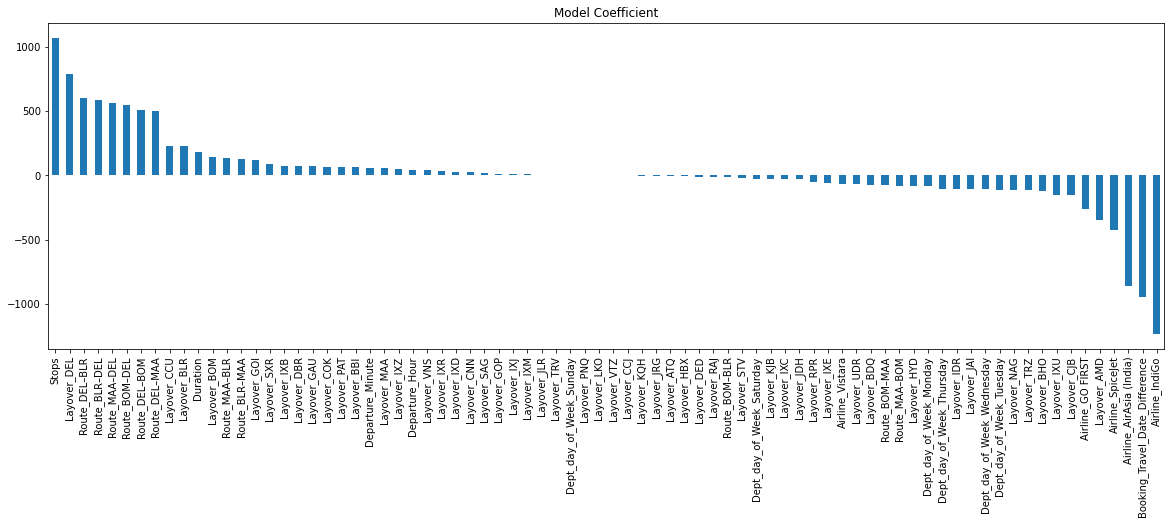

In [90]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
Model_reg(lr)

Model Report :-
RMSE 1562.6180240429671
MAE 1168.6575511480285
r2_score : 75.20832354368926
cv_score : 71.09222060696257
Difference between r2_score and cv is  4.116102936726691


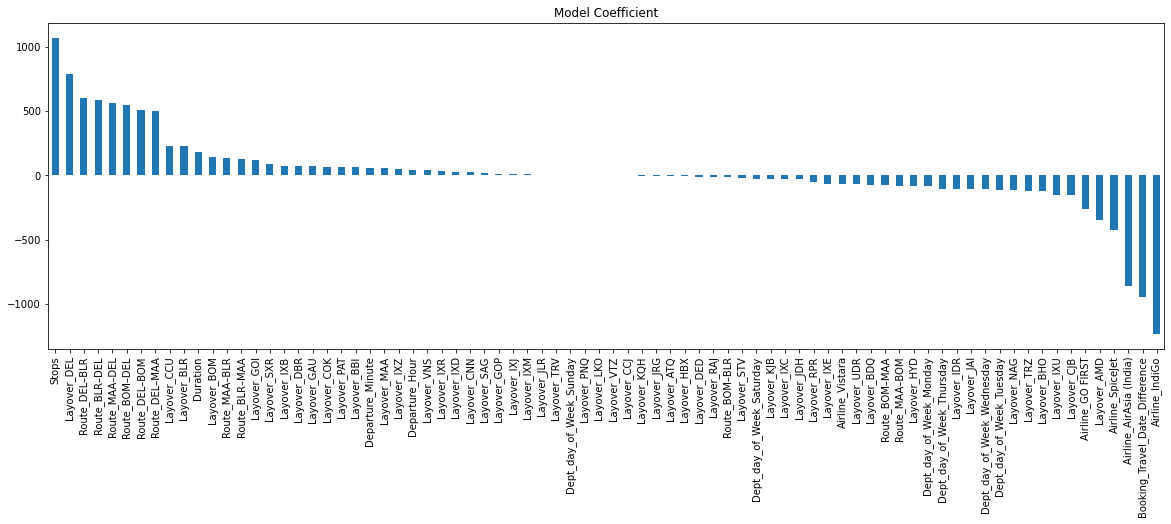

In [91]:
from sklearn.linear_model import Ridge
ridge = Ridge()
Model_reg(ridge)

Model Report :-
RMSE 1562.5442949862686
MAE 1168.4617781840836
r2_score : 75.21066298143901
cv_score : 71.03223459012486
Difference between r2_score and cv is  4.178428391314156


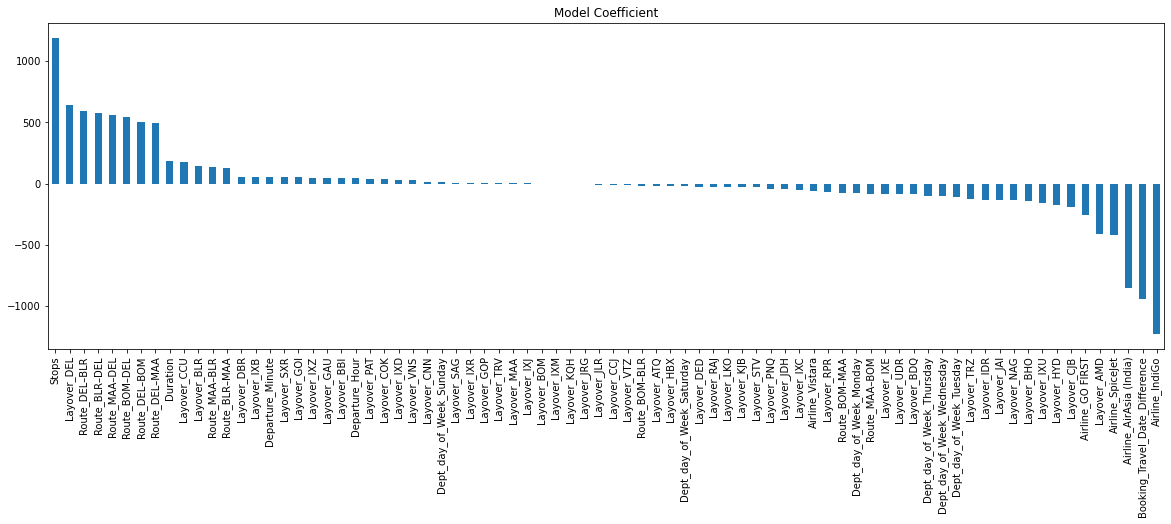

In [92]:
from sklearn.linear_model import Lasso
lasso = Lasso()
Model_reg(lasso)

Model Report :-
RMSE 1766.8069273121673
MAE 1316.3860752963592
r2_score : 68.30590002618014
cv_score : 43.96825407606805
Difference between r2_score and cv is  24.33764595011209


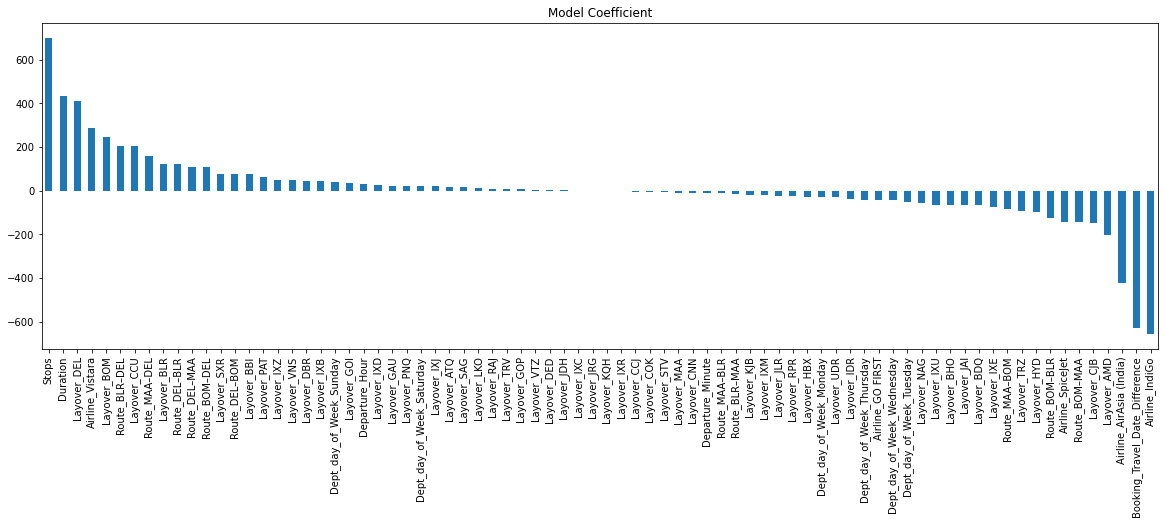

In [93]:
from sklearn.linear_model import ElasticNet
en = ElasticNet()
Model_reg(en)

Model Report :-
RMSE 938.7551847579989
MAE 304.7207956189882
r2_score : 91.05243351678327
cv_score : 75.02564835648053
Difference between r2_score and cv is  16.026785160302737


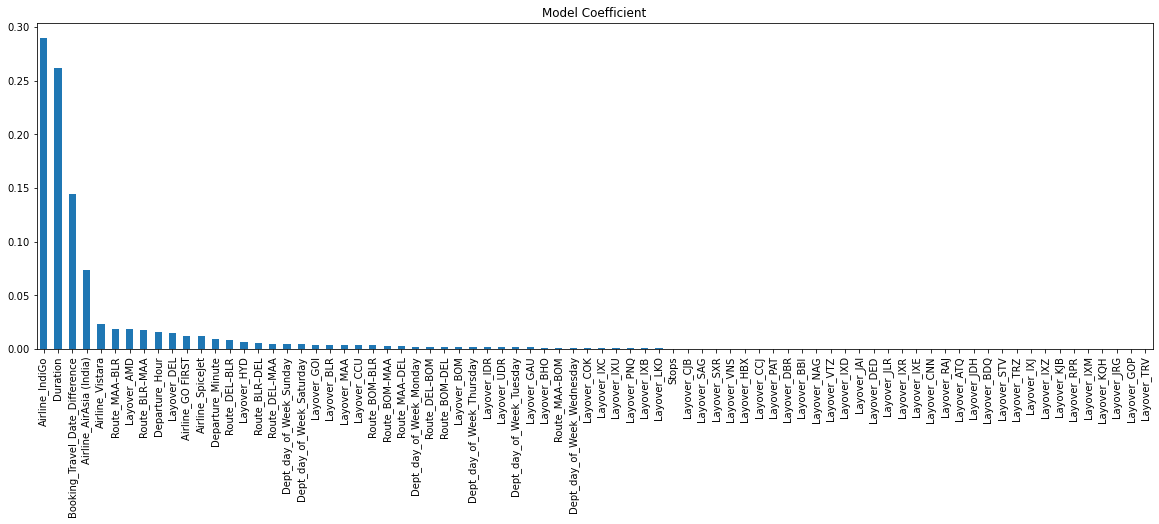

In [94]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
Model_tree(dt)

Model Report :-
RMSE 725.749817272789
MAE 300.37923105297506
r2_score : 94.65221292745726
cv_score : 83.72409435719314
Difference between r2_score and cv is  10.928118570264118


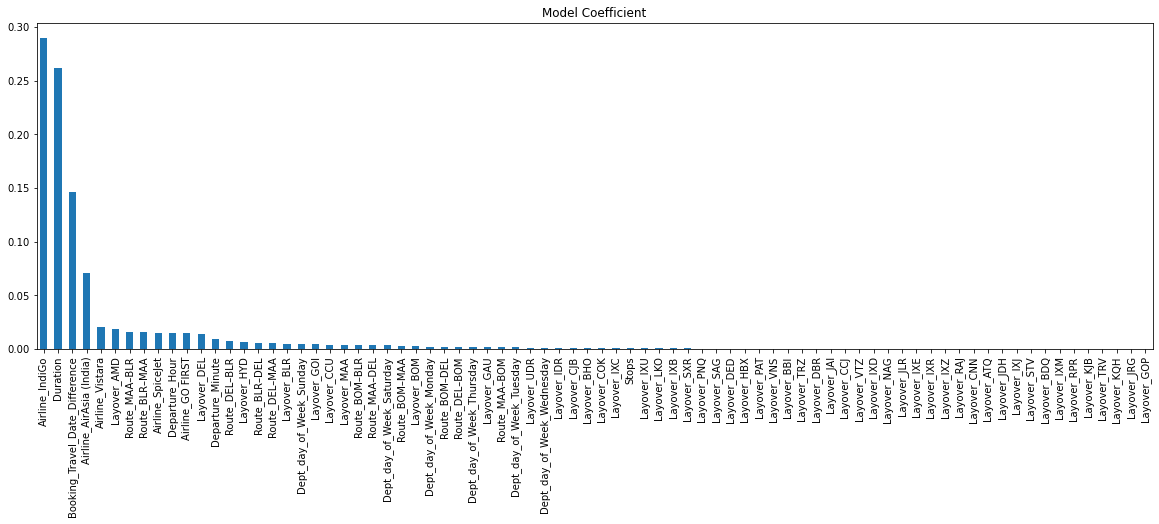

In [95]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
Model_tree(rf)

Model Report :-
RMSE 1320.108826147913
MAE 888.1811026437481
r2_score : 82.30625735401263
cv_score : 79.56942246209962
Difference between r2_score and cv is  2.7368348919130057


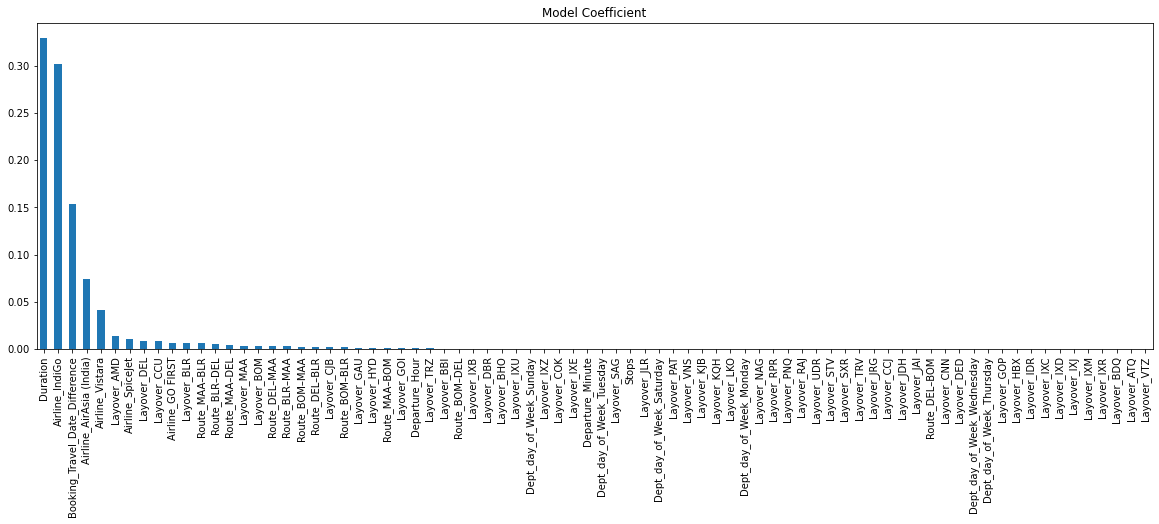

In [96]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
Model_tree(gbr)

Learning rate set to 0.085561
0:	learn: 2946.1531468	total: 158ms	remaining: 2m 38s
1:	learn: 2780.6668513	total: 166ms	remaining: 1m 22s
2:	learn: 2632.0530023	total: 173ms	remaining: 57.6s
3:	learn: 2499.6121532	total: 181ms	remaining: 45s
4:	learn: 2381.6272173	total: 188ms	remaining: 37.4s
5:	learn: 2275.3349326	total: 197ms	remaining: 32.6s
6:	learn: 2182.8075768	total: 204ms	remaining: 28.9s
7:	learn: 2101.1594542	total: 213ms	remaining: 26.5s
8:	learn: 2027.9418582	total: 222ms	remaining: 24.4s
9:	learn: 1962.9797069	total: 228ms	remaining: 22.6s
10:	learn: 1906.8412000	total: 234ms	remaining: 21s
11:	learn: 1857.2163483	total: 240ms	remaining: 19.7s
12:	learn: 1813.2495968	total: 246ms	remaining: 18.7s
13:	learn: 1770.4625231	total: 252ms	remaining: 17.7s
14:	learn: 1733.3034528	total: 258ms	remaining: 16.9s
15:	learn: 1703.1739105	total: 263ms	remaining: 16.2s
16:	learn: 1669.7954748	total: 272ms	remaining: 15.7s
17:	learn: 1646.0156527	total: 280ms	remaining: 15.3s
18:	learn:

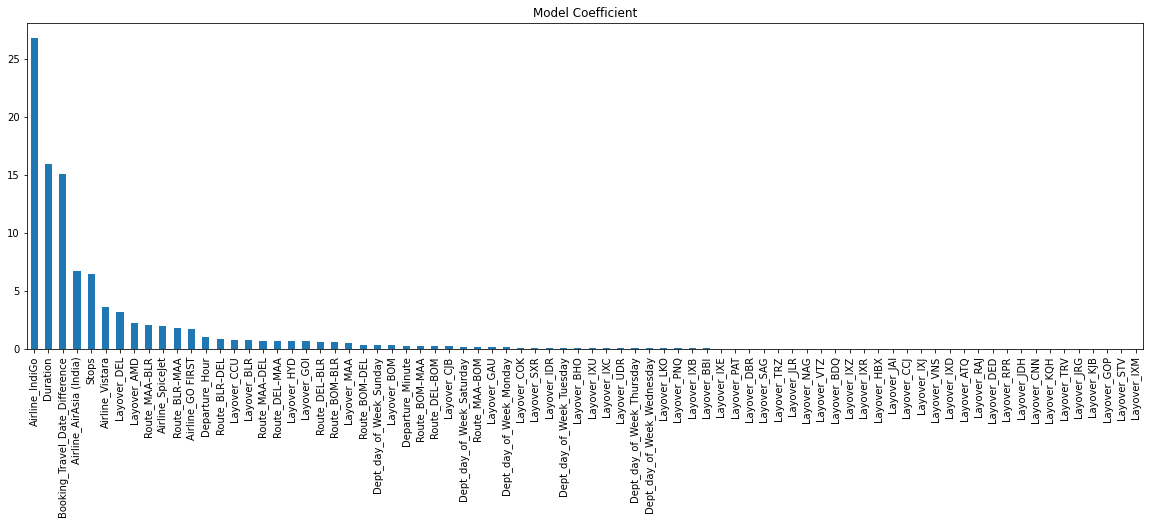

In [97]:
import catboost as ctb
CBR = ctb.CatBoostRegressor()
Model_tree(CBR)

### HyperParameter Tuning

In [98]:
from sklearn.model_selection import GridSearchCV

In [103]:
parameters = {'solver' : ['auto', 'svd', 'cholesky', 'lsqr'],
              'alpha':[0.001,0.01,0.1, 1]}

gcv = GridSearchCV(ridge,parameters,cv=78,n_jobs=-1)
gcv.fit(x_train,y_train)
gcv.best_params_

{'alpha': 1, 'solver': 'auto'}

In [104]:
gcv.best_estimator_

Ridge(alpha=1)

Model Report :-
RMSE 1562.6180240429671
MAE 1168.6575511480285
r2_score : 75.20832354368926
cv_score : 71.09222060696257
Difference between r2_score and cv is  4.116102936726691


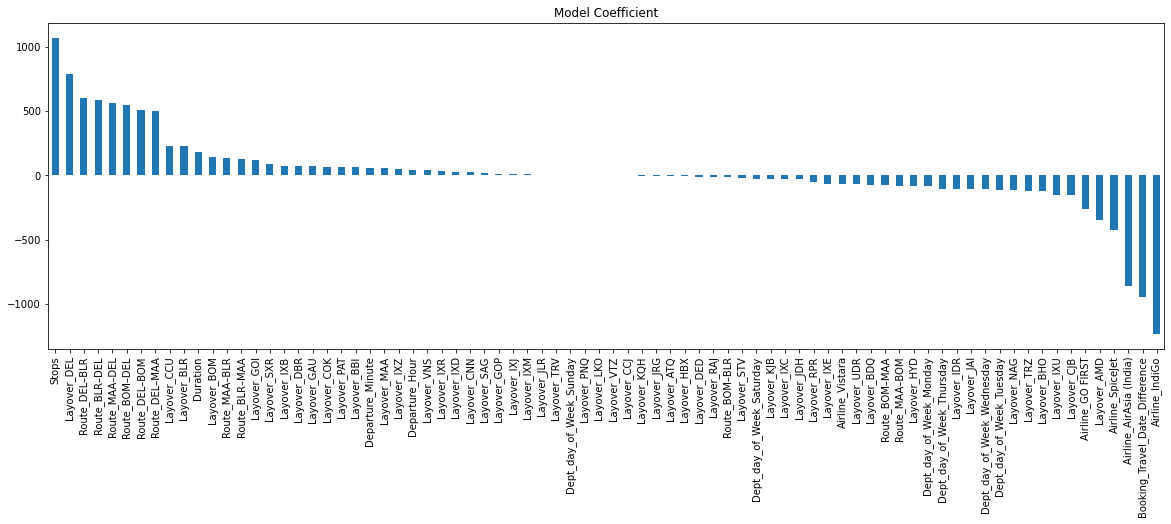

In [106]:
ridge = Ridge(alpha=1)

Model_reg(ridge)

In [107]:
gbr = GradientBoostingRegressor()
parameters = {'learning_rate':[0.01,0.1,1],
             'n_estimators':list(range(50,200,50)),
             'max_depth':[3,4,5]}
gcv = GridSearchCV(gbr,parameters,cv=78,n_jobs=-1)
gcv.fit(x_train,y_train)
gcv.best_params_

{'learning_rate': 1, 'max_depth': 5, 'n_estimators': 150}

In [108]:
gcv.best_estimator_

GradientBoostingRegressor(learning_rate=1, max_depth=5, n_estimators=150)

Model Report :-
RMSE 888.4303640042212
MAE 511.60395283034126
r2_score : 91.98604272214111
cv_score : 83.50855063198142
Difference between r2_score and cv is  8.477492090159686


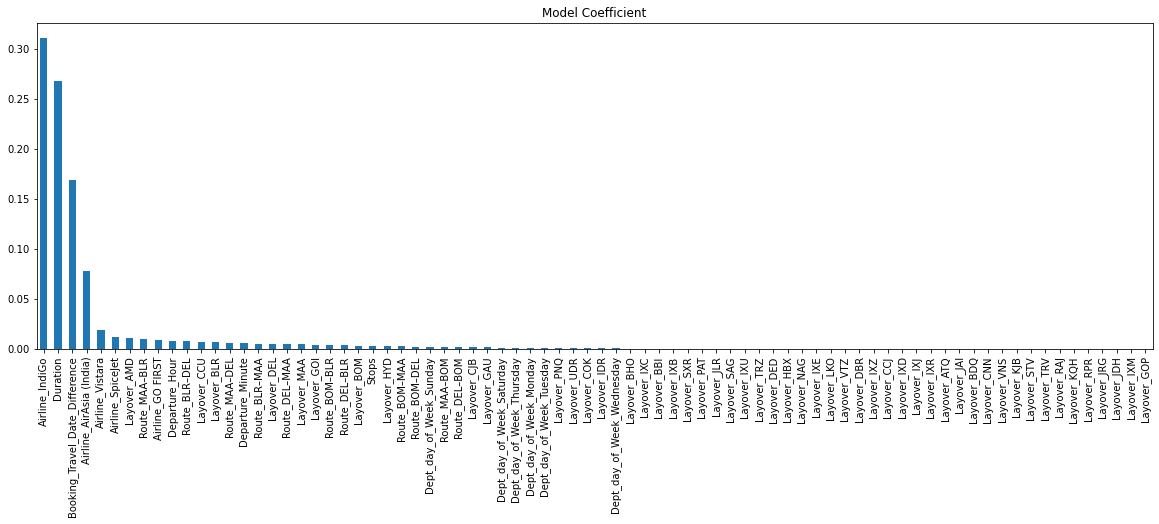

In [109]:
gbr = gcv.best_estimator_
Model_tree(gbr)

### We see that the best result is with Catboost and according to CatBoost documentation, it works best with default settings. Hence we choose not to do any HyperParameter Tuning.

### Final Model : GradientBoostingRegressor

Model Report :-
RMSE 1320.1088261479124
MAE 888.1811026437477
r2_score : 82.30625735401264
cv_score : 79.47464674222854
Difference between r2_score and cv is  2.8316106117841002


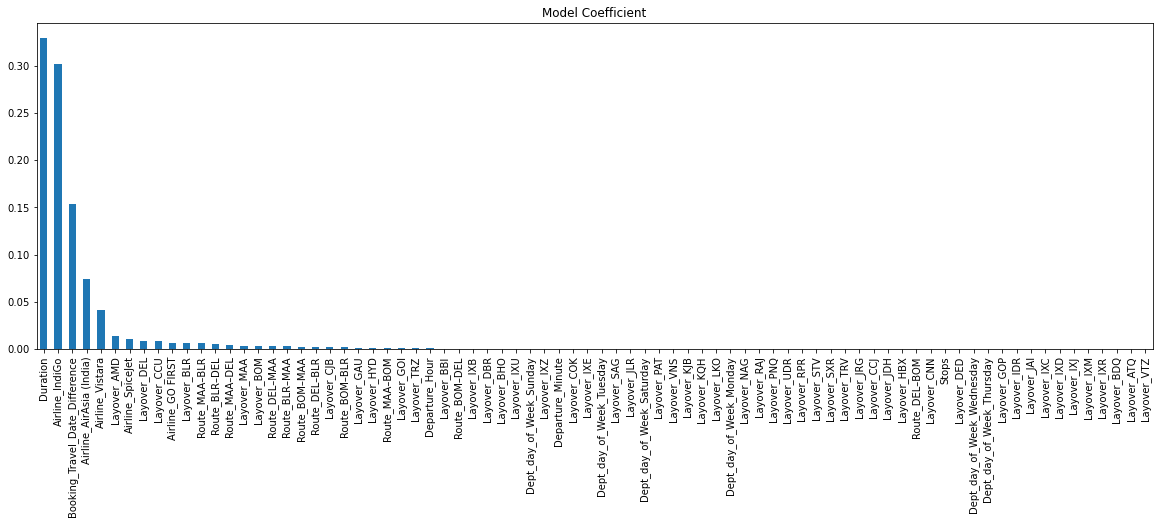

In [288]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred = gbr.predict(x_test)
cv_score = cross_val_score(gbr,x,y,cv=74)
cv_score = cv_score.mean()*100
print('Model Report :-')
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
print('MAE', mean_absolute_error(y_test,pred))
r2_Score = r2_score(y_test,pred)*100
print('r2_score :', r2_Score)
print('cv_score :', cv_score)
plt.figure(figsize=(20,6))
coef = pd.Series(gbr.feature_importances_,X.columns).sort_values(ascending=False)
coef.plot(kind='bar',title = 'Model Coefficient')
print('Difference between r2_score and cv is ',r2_Score-cv_score)

In [296]:
df_pred = pd.DataFrame()
df_pred['Actual']=y_test
df_pred['Prediction'] = pred
df_pred['% Difference'] = (df_pred['Actual']-df_pred['Prediction'])/df_pred['Actual']*100
df_pred.sample(10)

Actual    Prediction  % Difference
98688     6979   6851.396164      1.828397
99545     6034   5820.618866      3.536313
115057    6013   6395.168231     -6.355700
17114     7399   7158.668547      3.248161
41022    14023  11495.480143     18.024102
48371    10696  12186.124531    -13.931606
118061   10563  10692.331035     -1.224378
87417     6874   7185.816224     -4.536169
36884    13039  11336.288884     13.058602
64959    11685  11246.330306      3.754127

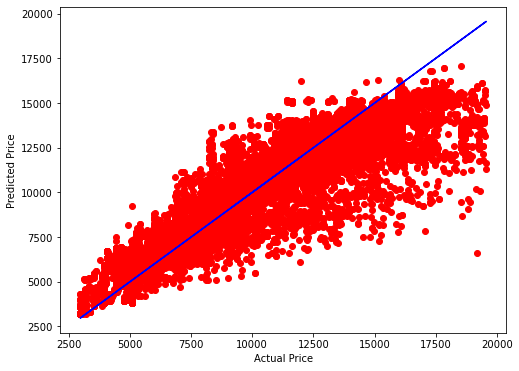

In [290]:
plt.figure(figsize=(8,6))
plt.scatter(x=df_pred['Actual'],y = df_pred['Prediction'],color='r')
plt.plot(df_pred['Actual'],df_pred['Actual'],color='b')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

### Saving the Model

In [293]:
import pickle

In [294]:
file_name = 'FR_FLIGHT_PRICE_PREDICTION_GBR.pkl'
pickle.dump(gbr,open(file_name,'wb'))